In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [30]:
  # Load data
  df = pd.read_csv("train baabtra data.csv")
  df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
# checking Missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# size of data
df.shape

(891, 12)

In [47]:
#unique value
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [33]:
#unique value
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [34]:
#unique value
df['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [35]:
#unique value
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [36]:
#unique value
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [37]:
#DATA Preprocessing
# encoding categorical features
#encoding Sex
df.replace({"Sex":{"female":0,"male":1}},inplace=True)
#encoding Embarked
df.replace({"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_14944\3472729922.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Sex":{"female":0,"male":1}},inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_14944\3472729922.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)


In [38]:
df['Age'].fillna(df['Age'].mean(), inplace=True)


C:\Users\User\AppData\Local\Temp\ipykernel_14944\1226013979.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [39]:
df# checking Missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
print(df['Embarked'].mode())
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


0    0.0
Name: Embarked, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_14944\852792965.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [41]:
df# checking Missing values

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0.0


In [44]:
#statistics
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [48]:
#unique value, (one is survived)
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

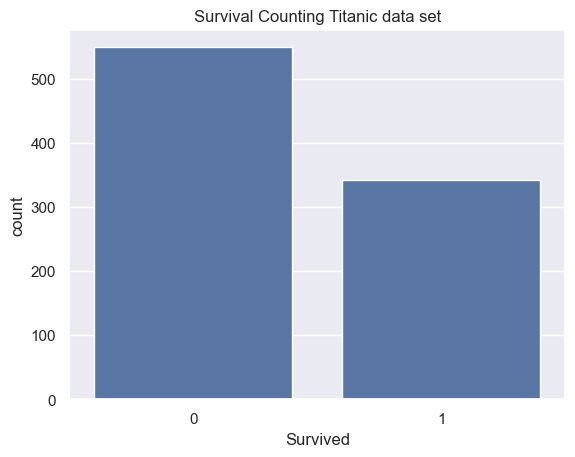

In [51]:
#data visualization

sns.set()

#making count plot for survived column

sns.countplot(x="Survived",data=df)
plt.xlabel("Survived")
plt.ylabel("count")
plt.title("Survival Counting Titanic data set")
plt.show()

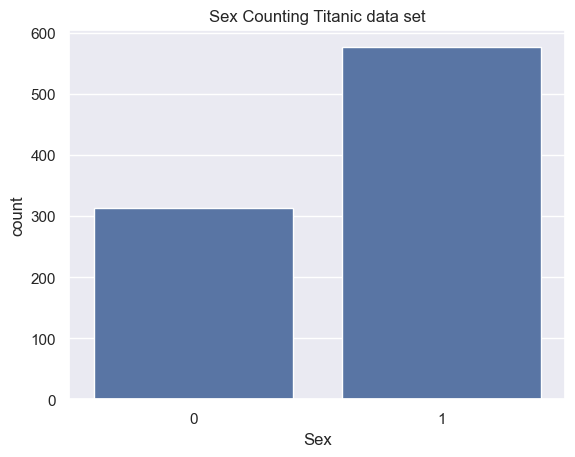

In [52]:
#making count plot for survived column
#Sex
sns.countplot(x="Sex",data=df)
plt.xlabel("Sex")
plt.ylabel("count")
plt.title("Sex Counting Titanic data set")
plt.show()

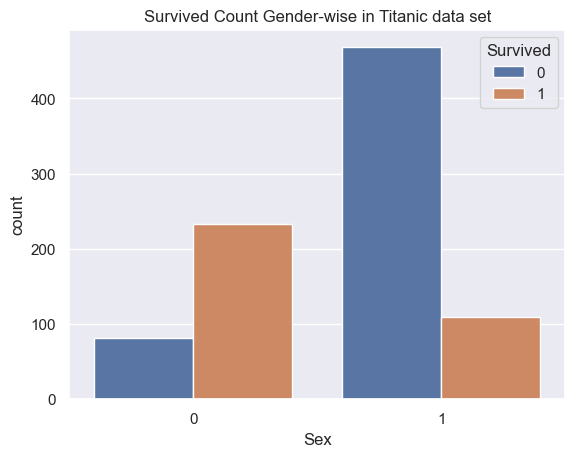

In [53]:
sns.countplot(x="Sex",hue="Survived",data=df)
plt.xlabel("Sex")
plt.ylabel("count")
plt.title("Survived Count Gender-wise in Titanic data set")
plt.show()

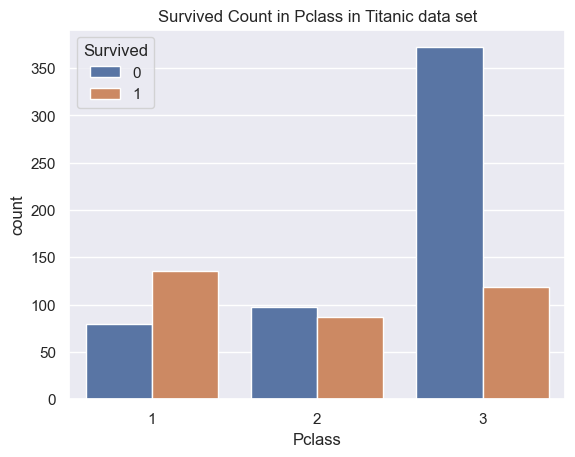

In [ ]:


sns.countplot(x="Pclass",hue="Survived",data=df)
plt.xlabel("Pclass")
plt.ylabel("count")
plt.title("Survived Count in Pclass in Titanic data set")
plt.show()

In [43]:
#splitting features and target

X = df.drop(["PassengerId","Name","Cabin","Survived","Ticket"],axis=1)
y = df["Survived"]

print(X.head())
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500       0.0
1       1    0  38.0      1      0  71.2833       1.0
2       3    0  26.0      0      0   7.9250       0.0
3       1    0  35.0      1      0  53.1000       0.0
4       3    1  35.0      0      0   8.0500       0.0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [46]:
#train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [59]:
#Model training

model = LogisticRegression()
model.fit(X_train,y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
# Evaluate metrics

Acc_score = round(accuracy_score(y_test,y_pred),2)

print(f"Accuracy_score(accuracy_score): {Acc_score}")

Accuracy_score(accuracy_score): 0.8


In [63]:
""" 
#encoding Sex
df.replace({"Sex":{"female":0,"male":1}},inplace=True)
#encoding Embarked
df.replace({"Embarked":{"S":0,"C":1,"Q":2}},inplace=True)"""


def predict_survival(pclass, sex, age, sibsp, parch, fare, embarked):
    # Convert 'sex' and 'embarked' to numerical if required (like 0/1 for sex)
    sex = 1 if sex.lower() == 'male' else 1
    embarked_map = {'s': 0, 'c': 1, 'q': 2}
    embarked = embarked_map[embarked.lower()]
   
    input_data = np.array([[pclass, sex, age, sibsp, parch, fare, embarked]])



    prediction = model.predict(input_data)

    if prediction[0] == 1:
        return "Survived"
    else:
        return "Did not survive"

# Example call
result = predict_survival(3, 'male', 22, 1, 0, 7.25, 's')
print("Prediction:", result)

Prediction: Did not survive


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
